In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/DS/04-Predictive Analytics I/Clustering/Online+Retail.csv', encoding = "ISO-8859-1", sep=',')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.isnull().values.any()

True

In [10]:
round(100*(df.isnull().sum()/df.shape[0]), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [11]:
order_wise = df.dropna()

In [12]:
order_wise.shape

(406829, 8)

In [13]:
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
amount = pd.DataFrame(order_wise['Quantity'] * order_wise['UnitPrice'], columns=['Amount'])
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [16]:
order_wise = pd.concat([order_wise, amount], axis=1, ignore_index = False)
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
monetary = order_wise.groupby('CustomerID').Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [18]:
frequency = order_wise[['CustomerID', 'InvoiceNo']]
k = frequency.groupby('CustomerID').InvoiceNo.count()
k.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [19]:
k = pd.DataFrame(k)
k.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17


In [20]:
k = k.reset_index()
k.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [21]:
k.columns = ["CustomerID", "Frequency"]
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [22]:
master = monetary.merge(k, on='CustomerID', how='inner')
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [23]:
recency = order_wise[['CustomerID', 'InvoiceDate']]
recency.head()

,CustomerID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00


In [24]:
maximum = max(recency['InvoiceDate'])
maximum

Timestamp('2011-12-09 12:50:00')

In [25]:
maximum = maximum + pd.DateOffset(days=1)
maximum

Timestamp('2011-12-10 12:50:00')

In [26]:
recency['diff'] = maximum - recency['InvoiceDate']
recency.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [27]:
a = recency.groupby('CustomerID')

In [28]:
a.diff.min()

CustomerID
12346.0   326 days 02:33:00
12347.0     2 days 20:58:00
12348.0    75 days 23:37:00
12349.0    19 days 02:59:00
12350.0   310 days 20:49:00
12352.0    36 days 22:13:00
12353.0   204 days 19:03:00
12354.0   232 days 23:39:00
12355.0   214 days 23:01:00
12356.0    23 days 04:10:00
12357.0    33 days 20:43:00
12358.0     2 days 02:24:00
12359.0     8 days 01:29:00
12360.0    52 days 21:28:00
12361.0   287 days 22:59:00
12362.0     3 days 21:10:00
12363.0   110 days 02:32:00
12364.0     8 days 02:28:00
12365.0   291 days 22:46:00
12367.0     4 days 20:02:00
12370.0    51 days 21:59:00
12371.0    45 days 02:34:00
12372.0    72 days 00:38:00
12373.0   311 days 23:40:00
12374.0    25 days 21:13:00
12375.0     3 days 01:23:00
12377.0   315 days 21:05:00
12378.0   130 days 02:16:00
12379.0    82 days 02:41:00
12380.0    22 days 01:23:00
                 ...       
18245.0     7 days 22:02:00
18246.0    24 days 01:01:00
18248.0   114 days 06:36:00
18249.0    17 days 21:43:00
18250.0  

In [30]:
df1 = pd.DataFrame(recency.groupby('CustomerID').diff.min())
df1 = df1.reset_index()
df1.columns = ["CustomerID", "Recency"]
df1.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [31]:
RFM = k.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df1, on = "CustomerID")
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


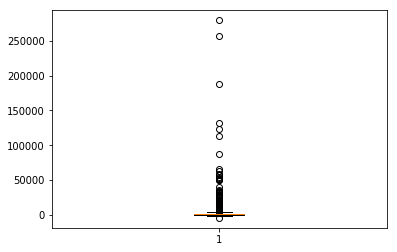

In [33]:
plt.boxplot(RFM['Amount'])
plt.show()

In [42]:
Q1 = RFM['Amount'].quantile(0.25)
Q3 = RFM['Amount'].quantile(0.75)
IQR = Q3 - Q1

In [43]:
RFM = RFM[(RFM['Amount'] >= Q1 - 1.5*IQR) & (RFM['Amount'] <= Q3 + 1.5*IQR)]

In [45]:
RFM.shape

(3949, 4)

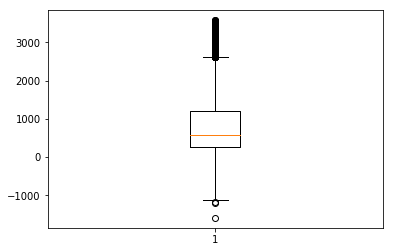

In [46]:
plt.boxplot(RFM['Amount'])
plt.show()

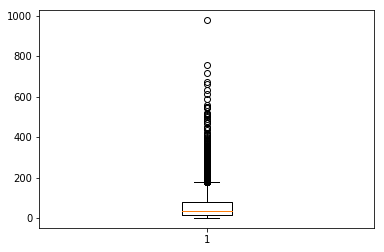

In [48]:
plt.boxplot(RFM['Frequency'])
Q1 = RFM['Frequency'].quantile(0.25)
Q3 = RFM['Frequency'].quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM['Frequency'] >= Q1 - 1.5*IQR) & (RFM['Frequency'] <= Q3 + 1.5*IQR)]
plt.show()

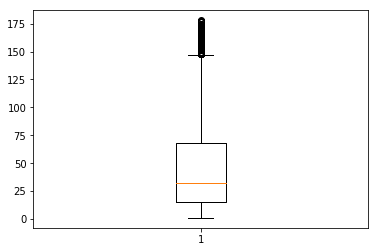

In [49]:
plt.boxplot(RFM['Frequency'])
plt.show()

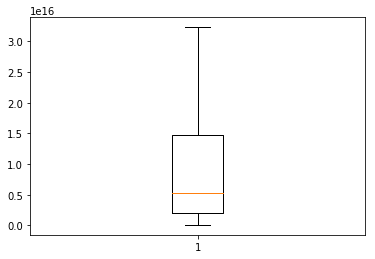

In [51]:
plt.boxplot(RFM['Recency'])
Q1 = RFM['Recency'].quantile(0.25)
Q3 = RFM['Recency'].quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM['Recency'] >= Q1 - 1.5*IQR) & (RFM['Recency'] <= Q3 + 1.5*IQR)]
plt.show()

In [53]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00


In [55]:
RFM_normal = RFM.drop('CustomerID', axis=1)
RFM_normal['Recency'] = RFM_normal['Recency'].dt.days

In [56]:
RFM_normal.head()

,Frequency,Amount,Recency
0,2,0.00,326
2,31,1797.24,75
3,73,1757.55,19
4,17,334.40,310
5,95,1545.41,36


In [57]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
RFM_normal = standard.fit_transform(RFM_normal)

In [59]:
RFM_normal

array([[-1.07094871, -1.04161396,  2.13642223],
       [-0.3754979 ,  1.38529792, -0.28204953],
       [ 0.63170672,  1.33170234, -0.82162889],
       ...,
       [-0.9510434 , -0.93247827,  0.73929711],
       [-0.80715703, -0.80314128, -0.92761769],
       [ 0.55976353,  1.43936613, -0.59038059]])

In [61]:
RFM_normal = pd.DataFrame(RFM_normal)
RFM_normal.columns = ['Frequency','Amount','Recency']
RFM_normal.head()

,Frequency,Amount,Recency
0,-1.070949,-1.041614,2.136422
1,-0.375498,1.385298,-0.282050
2,0.631707,1.331702,-0.821629
3,-0.711233,-0.590055,1.982257
4,1.159290,1.045238,-0.657828


In [62]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [63]:
hopkins(RFM_normal)

0.8922379768557323

In [64]:
model_clus = KMeans(n_clusters = 5, max_iter = 50).fit(RFM_normal)

In [65]:
model_clus

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
model_clus.labels_

array([4, 0, 0, ..., 4, 1, 0])

In [67]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(RFM_normal)
    sse_.append([k, silhouette_score(RFM_normal, kmeans.labels_)])

In [69]:
sse_

[[2, 0.42929467976639346],
 [3, 0.43987159637455586],
 [4, 0.40851721359807264],
 [5, 0.38940731623509356],
 [6, 0.35689776191850253],
 [7, 0.3321562335093186],
 [8, 0.3411560444456715],
 [9, 0.34906763596006124],
 [10, 0.3530438754498385],
 [11, 0.3194186985198905],
 [12, 0.30466469687864167],
 [13, 0.30871994933401387],
 [14, 0.3121742755819166]]

In [70]:
sse_ = pd.DataFrame(sse_)
sse_

,0,1
0,2,0.429295
1,3,0.439872
2,4,0.408517
3,5,0.389407
4,6,0.356898
5,7,0.332156
6,8,0.341156
7,9,0.349068
8,10,0.353044
9,11,0.319419


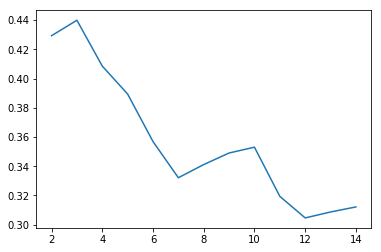

In [72]:
plt.plot(sse_[0], sse_[1])
plt.show()

In [81]:
ssd = []
for n in range(1,21):
    ssd_clus = KMeans(n_clusters=n, max_iter=50).fit(RFM_normal)
    ssd.append(ssd_clus.inertia_)

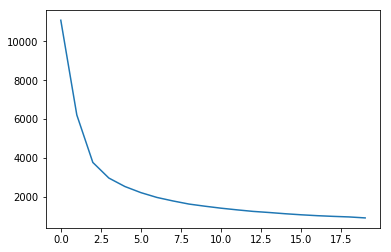

In [82]:
plt.plot(ssd)

In [86]:
RFM.index = pd.RangeIndex(len(RFM.index))

In [90]:
RFM_km = pd.concat([RFM, pd.Series(model_clus.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']
RFM_km.head()

,CustomerID,Frequency,Amount,Recency,ClusterID
0,12346.0,2,0.00,326 days 02:33:00,4
1,12348.0,31,1797.24,75 days 23:37:00,0
2,12349.0,73,1757.55,19 days 02:59:00,0
3,12350.0,17,334.40,310 days 20:49:00,4
4,12352.0,95,1545.41,36 days 22:13:00,3


In [91]:
RFM_km['ClusterID'].value_counts()

1    1369
4     909
0     685
3     367
2     367
Name: ClusterID, dtype: int64

In [92]:
RFM_km['Recency'] = RFM_km['Recency'].dt.days

In [93]:
RFM_km.head()

,CustomerID,Frequency,Amount,Recency,ClusterID
0,12346.0,2,0.00,326,4
1,12348.0,31,1797.24,75,0
2,12349.0,73,1757.55,19,0
3,12350.0,17,334.40,310,4
4,12352.0,95,1545.41,36,3


In [97]:
km_clusters_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [99]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.head()

,0,Amount,Frequency,Recency
0,0,1201.448994,53.668613,50.119708
1,1,357.594530,23.325785,57.572681
2,2,2471.402482,117.888283,38.198910
3,3,912.557139,114.021798,53.980926
4,4,327.037096,20.558856,262.393839


In [100]:
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,1201.448994,53.668613,50.119708
1,1,357.594530,23.325785,57.572681
2,2,2471.402482,117.888283,38.198910
3,3,912.557139,114.021798,53.980926
4,4,327.037096,20.558856,262.393839


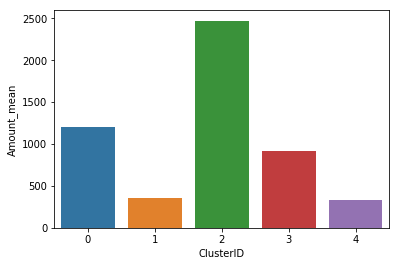

In [101]:
sns.barplot(x=df['ClusterID'], y=df['Amount_mean'])
plt.show()

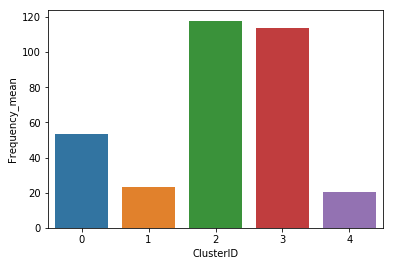

In [102]:
sns.barplot(x=df['ClusterID'], y=df['Frequency_mean'])

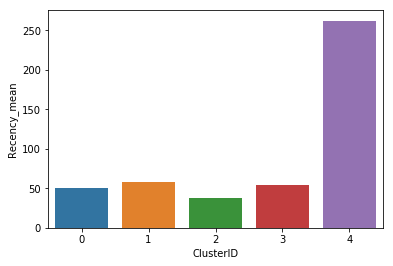

In [103]:
sns.barplot(x=df['ClusterID'], y=df['Recency_mean'])